In [1]:
import numpy as np
import matplotlib.pyplot as plt

# print out each line in the input cell not only the last one
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# expand the cell width to 100% of t 
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:70% !important; }</style>"))

# Julia Mengen
---
*Erstellt von: Simon Gärtner*

## Einführung
---

*Inhalt folgt!*

# Implementierung in SageMath
---

In [2]:
# define variables
x, c = var('x', 'c')

In [3]:
def initialize_julia_sets(constant_c, start_value, formular, x_start, x_end, y_start, y_end):
    return {'constant_c': constant_c, 'start_value': start_value, 'formular': formular, 'x_start': x_start, 'x_end': x_end, 'y_start': y_start, 'y_end': y_end}

In [4]:
def get_function_value(func, x, c):
    return func(x, c)

In [5]:
def initialize_matrix(x_start, x_end, y_start, y_end):
    list = []
    
    for col in np.arange(x_start, x_end + 1, 0.1):
        col_list = []
        
        for row in np.arange(y_start, y_end + 1, 0.1):
            col_list.append(col + row * i)
        list.append(col_list)

    return Matrix(CDF, list)

In [6]:
def print_matrix(matrix):
    return matrix_plot(matrix, cmap = 'ocean', colorbar = True, axes = False, frame = True)

In [7]:
def validate_point(complex_number, func, setup):
    run = 50
    while(run > 0 and complex_number < 2):
        complex_number = get_function_value(func, complex_number, setup['constant_c'])
        run -= 1
        
    return run

In [8]:
def change_matrix(matrix, x_start, x_end, y_start, y_end, func, setup):
    
    list = []
    for row in range((y_end - y_start) * 10 + 1):
        rows = []
        for col in range ((x_end - x_start) * 10 + 1):
            rows.append(validate_point(matrix[col][row], func, setup))
        list.append(rows)
            
    return Matrix(CDF, list)

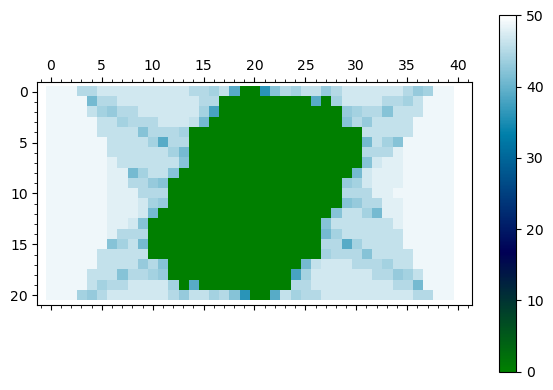

In [9]:
# testing
setup = initialize_julia_sets(0.31*i + 0.04, 1, x^2+c, -2, 2, -1, 1)
func(x,c) = setup['formular']

matrix = initialize_matrix(setup['x_start'], setup['x_end'], setup['y_start'], setup['y_end'])
matrix = change_matrix(matrix, setup['x_start'], setup['x_end'], setup['y_start'], setup['y_end'], func, setup)

print_matrix(matrix)

## Fazit
---

*Inhalt folgt!*

## Übungsaufgaben
---

*Inhalt folgt!*

## Lösungen
---

*Inhalt folgt!*